
# Author : Nasir Khan

# Task 1 : Prediction using Supervised Machine Learning
**GRIP @ The Sparks Foundation**

In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

This is a simple linear regression task as it involves just two variables.

**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Step 1: Reading the data

In [2]:
df=pd.read_csv(r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("Read the data successfully")

Read the data successfully


In [3]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.shape

(25, 2)

In [5]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Step 2: Visualizing the dataset

In this step we will plot the dataset to check the whether we can observe any relation between the two varaibles or not.

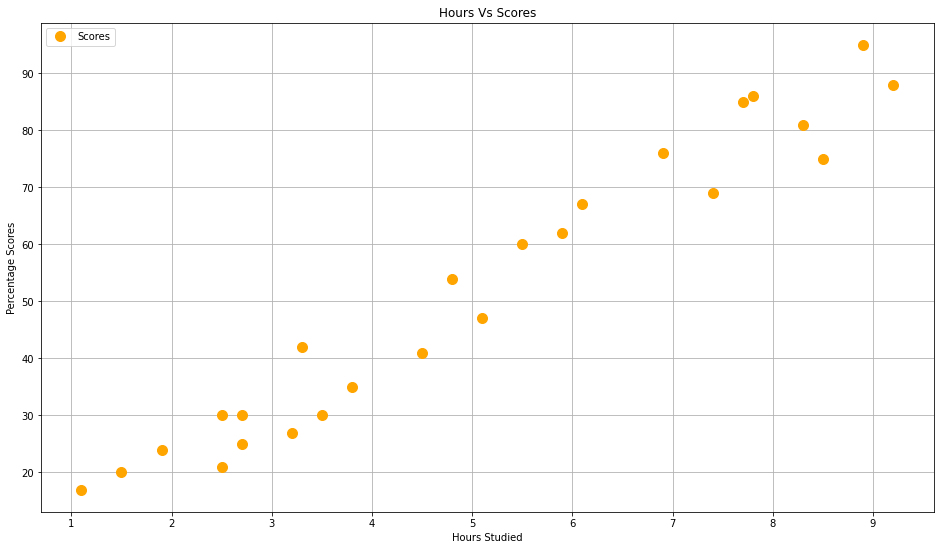

In [8]:
plt.rcParams["figure.figsize"] = [16,9]
df.plot(x="Hours",y="Scores",style="o",color="orange",markersize=10)
plt.title("Hours Vs Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scores")
plt.grid()
plt.show()



From the above graph, we can observe the there is a positive linear relationship between "Hours Studied" and "Percentage Scores". So, we can use the linear regression supervised machine learning model on it to predict further values.

In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Step 3: Data Preprocessing

In this step we will divide the data into 'features' (inputs) and 'labels' (outputs). After that we will split the whole dataset into 2 parts testing data and training data. We'll do this by using Scikit-Learn's built-in train_test_split() method:



In [10]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [11]:
x=df.iloc[:,:1].values
y=df.iloc[:,1:].values

In [12]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [14]:
#Splitting the data into training and testing sets, and training the algorithm.

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Step 4: Model Training
We have splitted our data into training and testing sets, and now we will train our model

In [15]:
model=LinearRegression()
model.fit(x_train,y_train)
print("Training Complete")

Training Complete


# Step 5: Visualizing the model

Now since our model is trained now, its the time to visualize the best-fit line of regression.

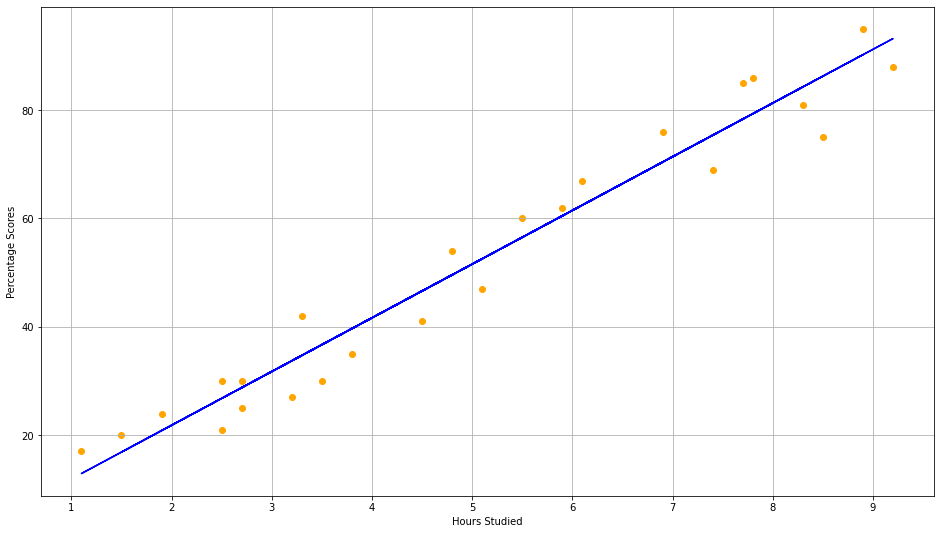

In [16]:
# Plotting for training data
line = model.coef_*x+model.intercept_
plt.scatter(x, y,color="orange")
plt.plot(x, line,color="blue");
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scores")
plt.grid()
plt.show()

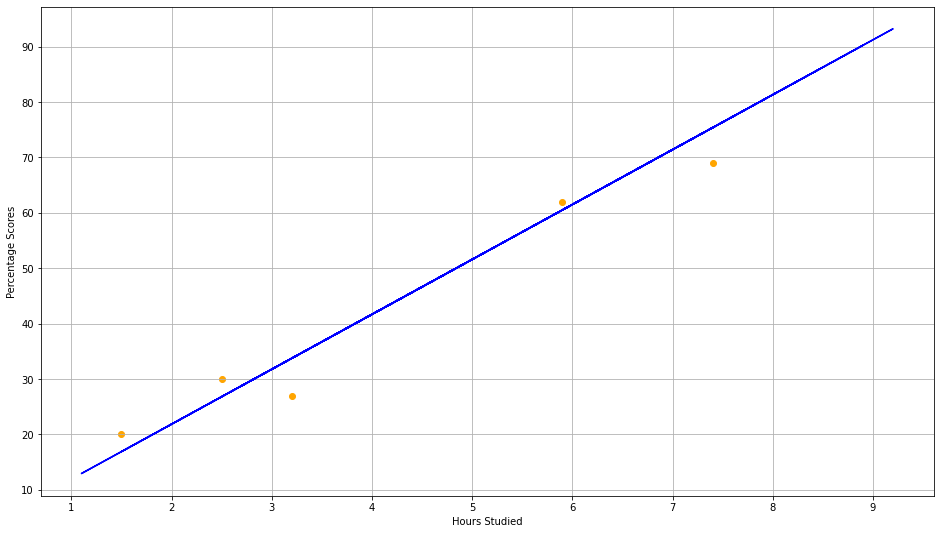

In [17]:
# Plotting for testing data

plt.scatter(x_test,y_test,color="orange")
plt.plot(x, line,color='blue');
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scores")
plt.grid()
plt.show()

# Step 6: Making Prediction

In [18]:
# Testing the data - In Hours
print(x_test) 

# Prediction the Scores
y_predict=model.predict(x_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [19]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [20]:
y_predict

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [21]:
# Comparing Actual Vs Predicted
comp = pd.DataFrame({'Actual':[y_test], 'Predicted':[y_predict]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398048], [33.73226077948985], [7..."


In [22]:

# Testing the model with our own data
hrs = 9.25
test = np.array([hrs])
test = test.reshape(-1, 1)
own_pred = model.predict(test)
print("No. of Hours = {}".format(hrs))
print("Predicted Score = {}".format(own_pred[0]))

No. of Hours = 9.25
Predicted Score = [93.69173249]


# Step 7: Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [23]:

from sklearn import metrics

print("Mean Absolute Error :",metrics.mean_absolute_error(y_test,y_predict))
print("Mean Squared Error :",metrics.mean_squared_error(y_test,y_predict))
print("Root Mean Squared Error :",np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print("R-2 :",metrics.r2_score(y_test,y_predict))

Mean Absolute Error : 4.183859899002975
Mean Squared Error : 21.598769307217406
Root Mean Squared Error : 4.647447612100367
R-2 : 0.9454906892105355



R-2 gives the score of model fit and in this case we have R-2 = 0.9454906892105355 which is actually a great score for this model.

# Conclusion
I was successfully able to carry-out Prediction using Supervised Machine Learning task and was able to evaluate the model's performance on various parameters.

